In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yfin
yfin.pdr_override()
%matplotlib inline

In [2]:
ticker = 'DOL.TO'
start_date = '2023-04-01'
end_date = '2024-04-30'
df_yf = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


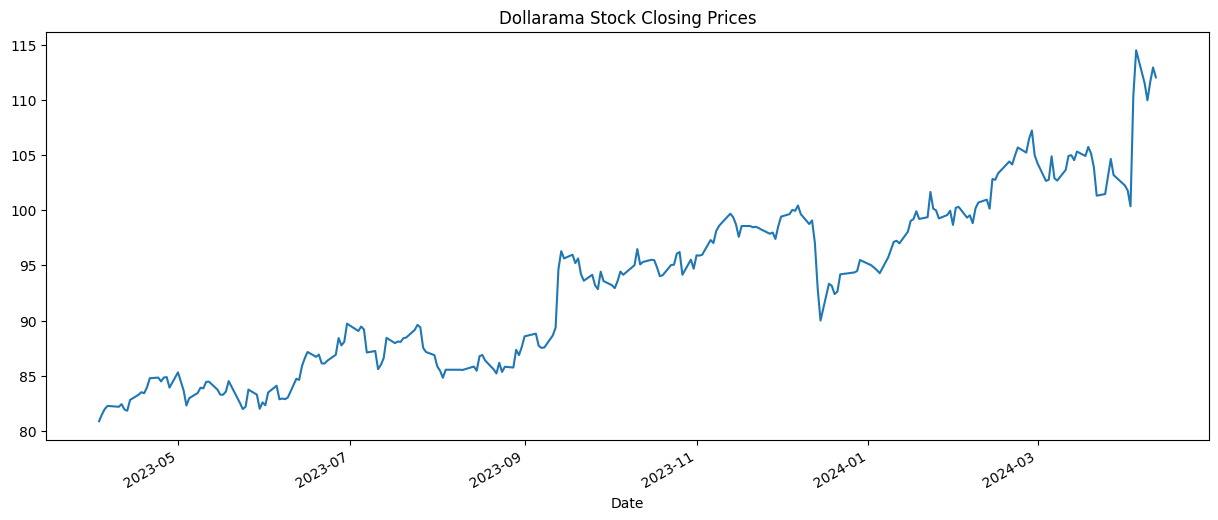

In [3]:
df_yf['Close'].plot(figsize=(15,6))
plt.title("Dollarama Stock Closing Prices")
plt.show()

In [4]:
stock_returns = np.log(1 + df_yf['Close'].pct_change())

<ipython-input-5-fc4d858f608f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_returns[1:], bins=100)


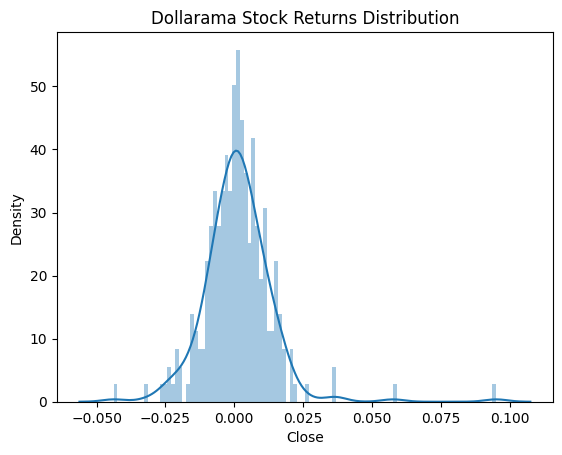

In [5]:
sns.distplot(stock_returns[1:], bins=100)
plt.title("Dollarama Stock Returns Distribution")
plt.show()

In [6]:
def monte_carlo_simulation(start_price, days, drift, stddev, simulations):
    daily_returns = np.exp(drift + stddev * norm.ppf(np.random.rand(days, simulations)))
    price_paths = np.zeros_like(daily_returns)
    price_paths[0] = start_price
    for t in range(1, days):
        price_paths[t] = price_paths[t-1] * daily_returns[t]
    return price_paths

In [7]:
days = 30
simulations = 100

In [8]:
u = stock_returns.mean()
var = stock_returns.var()
drift = u - (0.5 * var)
stddev = stock_returns.std()

In [9]:
start_price = df_yf['Close'].iloc[-1]
price_paths = monte_carlo_simulation(start_price, days, drift, stddev, simulations)

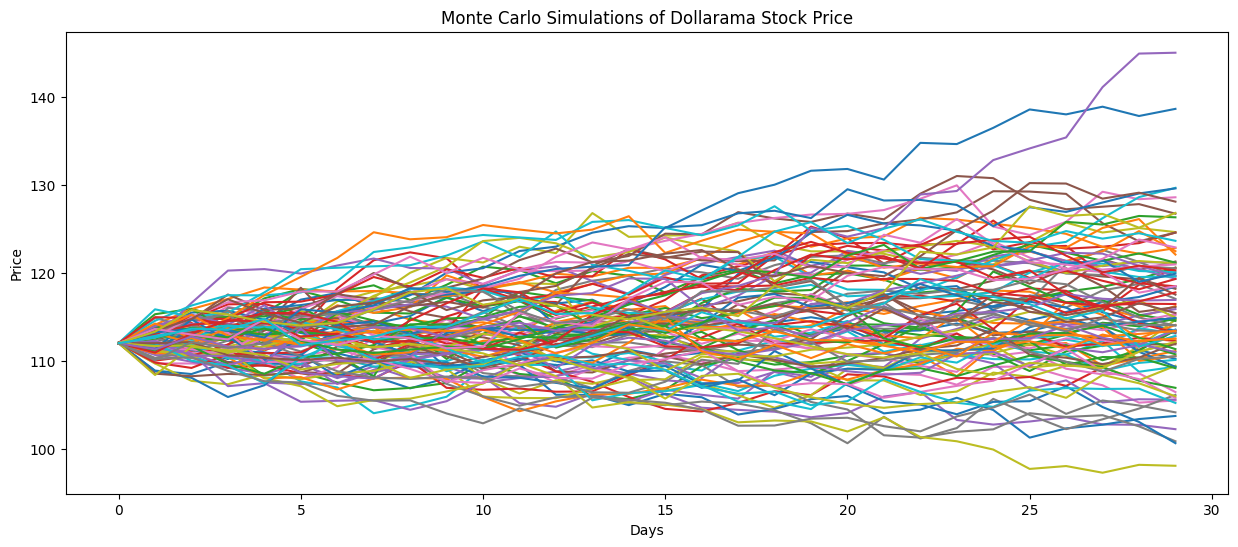

In [10]:
plt.figure(figsize=(15,6))
plt.plot(price_paths)
plt.title("Monte Carlo Simulations of Dollarama Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [11]:
!pip install prophet

In [12]:
from prophet import Prophet

In [13]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_yf.index
df_prophet['y'] = df_yf['Close'].values

In [14]:
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpacwfk3d4/dew3fc_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpacwfk3d4/u33bf_j2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84962', 'data', 'file=/tmp/tmpacwfk3d4/dew3fc_b.json', 'init=/tmp/tmpacwfk3d4/u33bf_j2.json', 'output', 'file=/tmp/tmpacwfk3d4/prophet_modeluof2jdy8/prophet_model-20240415014120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

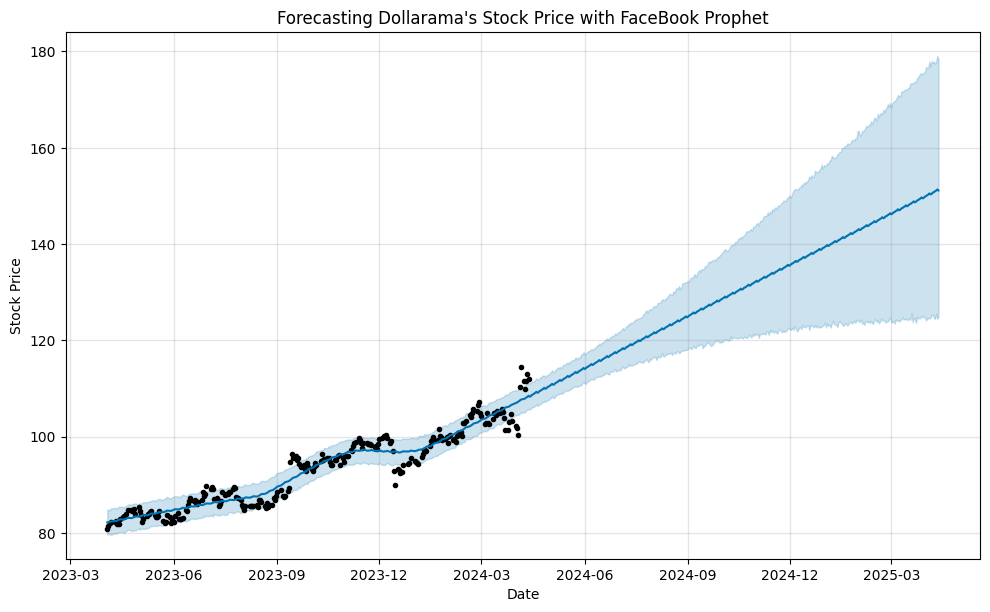

In [16]:
model.plot(forecast)
plt.title("Forecasting Dollarama's Stock Price with FaceBook Prophet")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

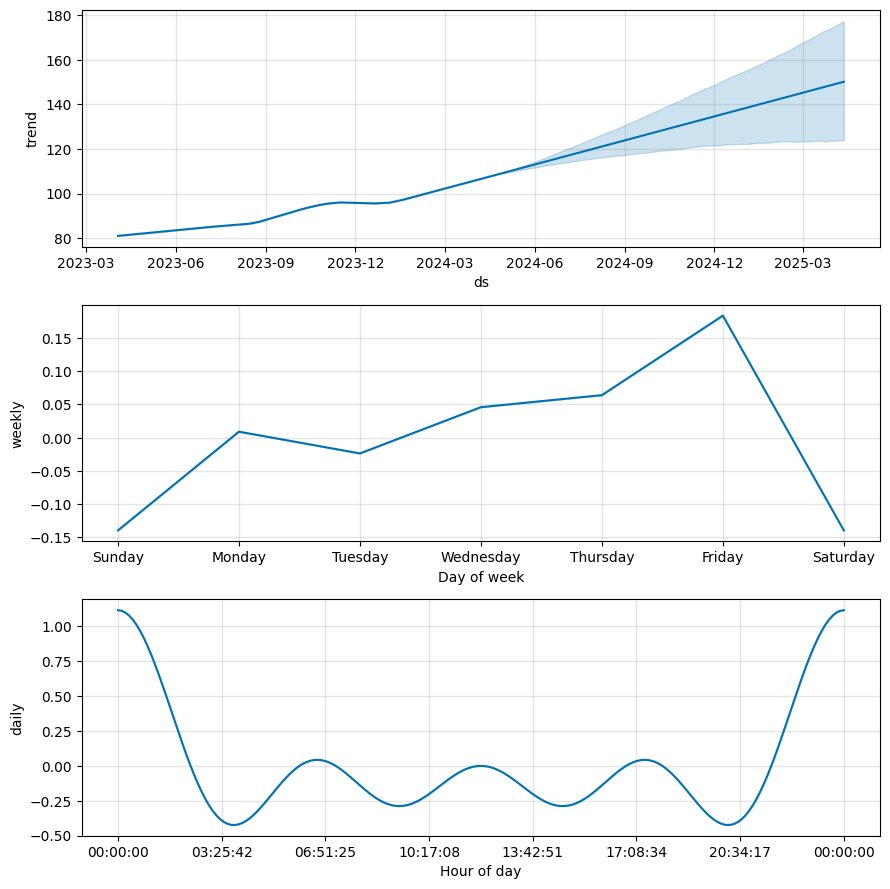

In [17]:
model.plot_components(forecast)
plt.show()